EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Chargement des données

In [2]:
train_df = pd.read_csv("C:/Users/David/Documents/Albert school/ML/playground-series-s4e10/train.csv", index_col="id")
test_df = pd.read_csv("C:/Users/David/Documents/Albert school/ML/playground-series-s4e10/test.csv", index_col="id")
submission_df = pd.read_csv("C:/Users/David/Documents/Albert school/ML/playground-series-s4e10/sample_submission.csv", index_col="id")


In [3]:
train_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1


Data Cleaning

In [4]:
train_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Le dataset est propre

Début d'analyse

In [5]:
train_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
train_df.shape

(58645, 12)

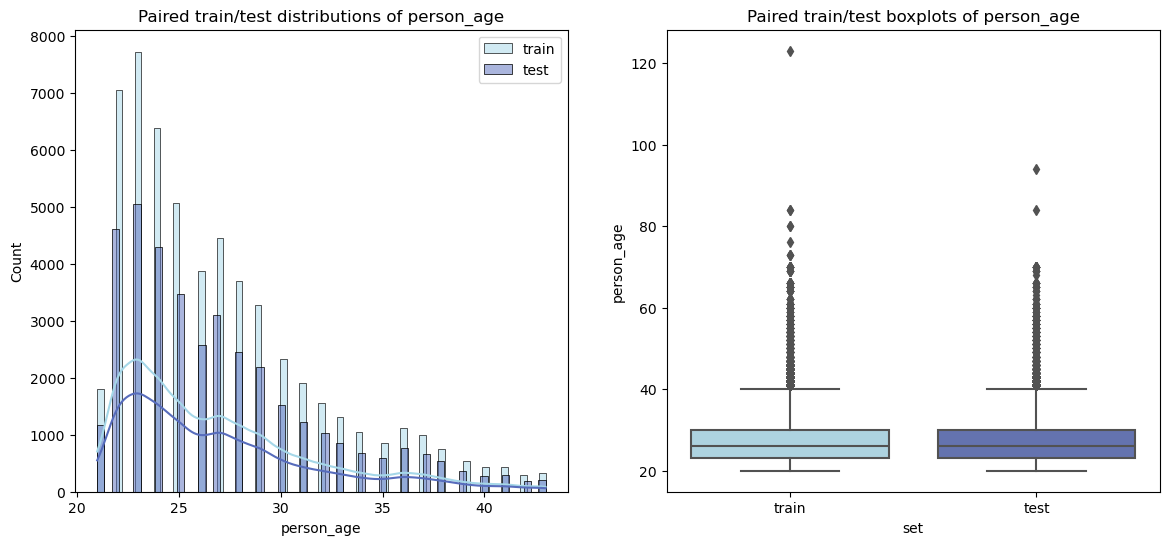

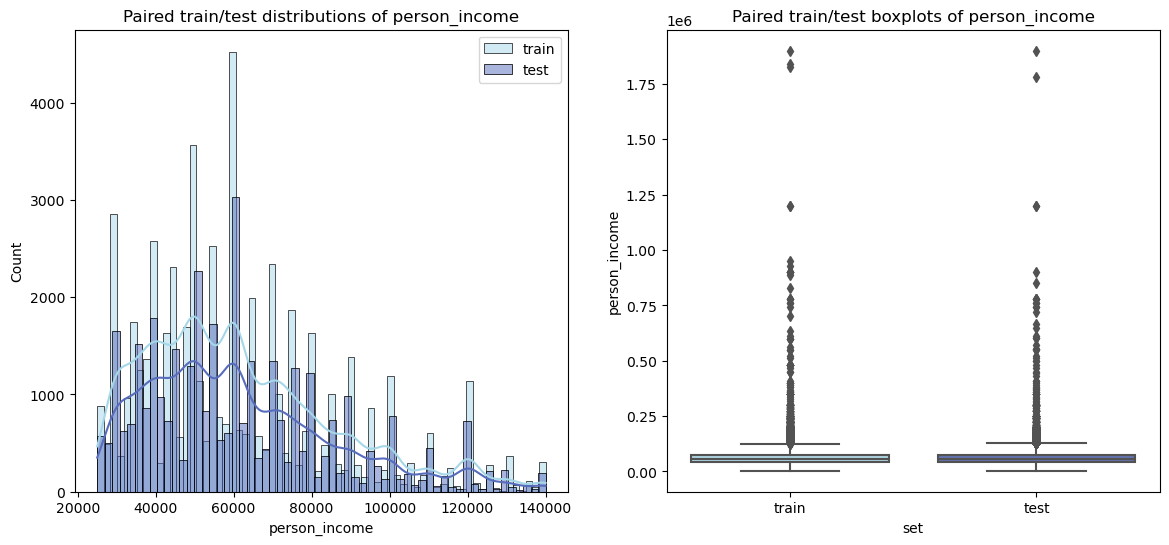

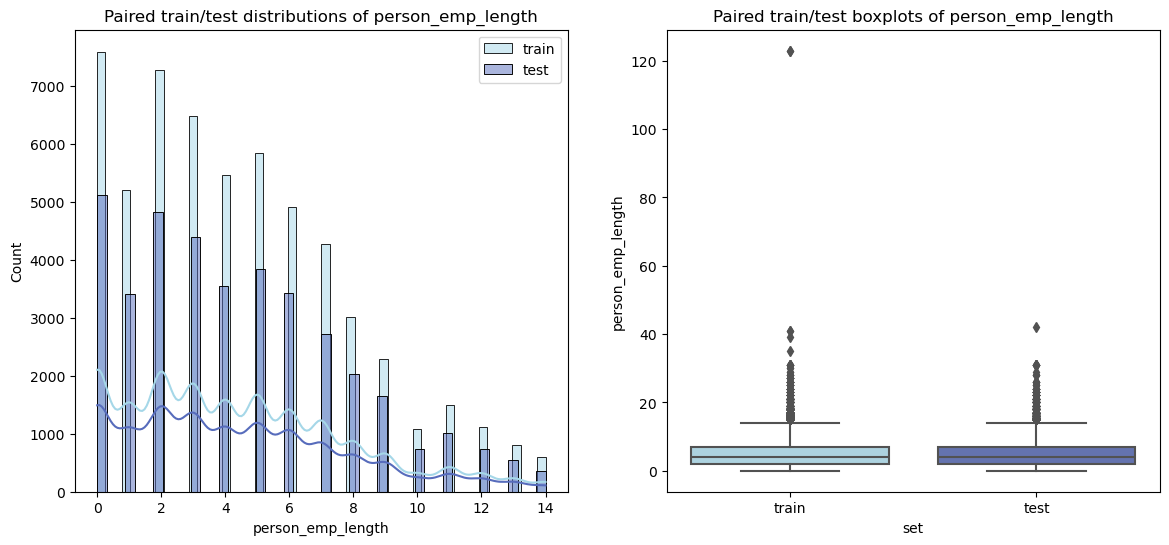

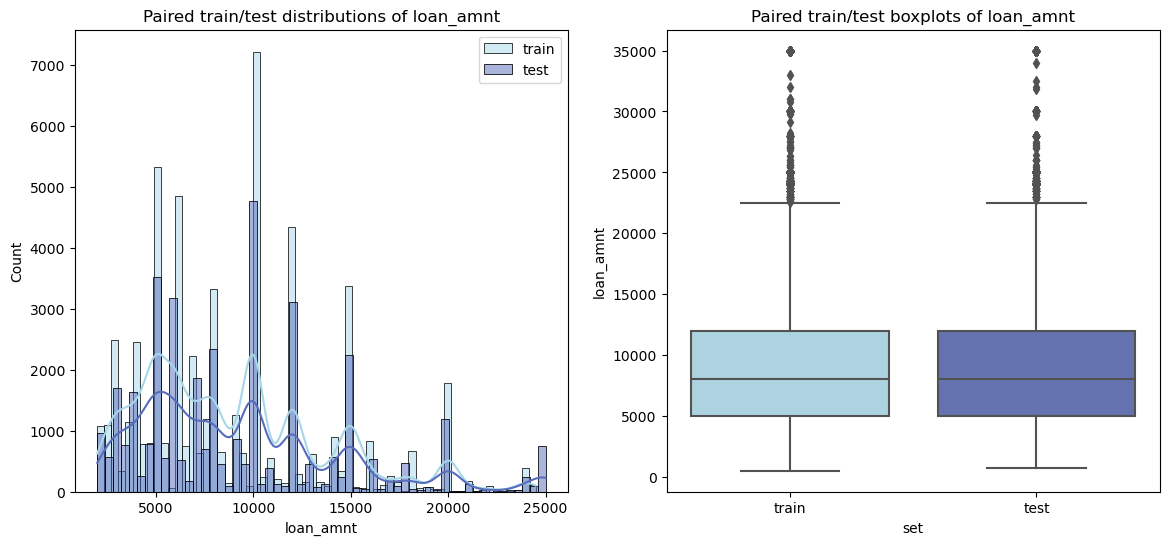

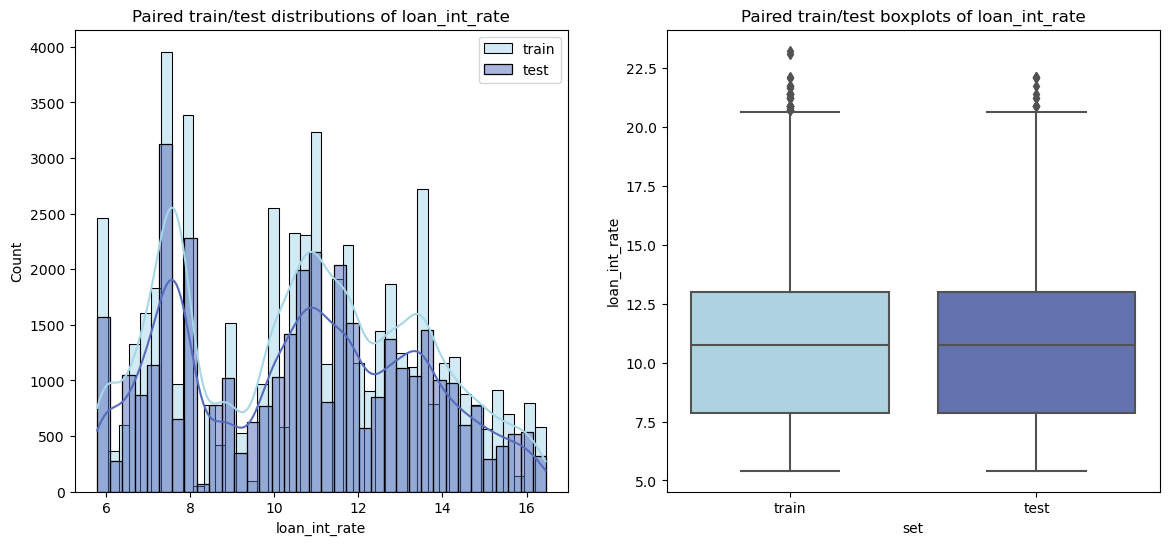

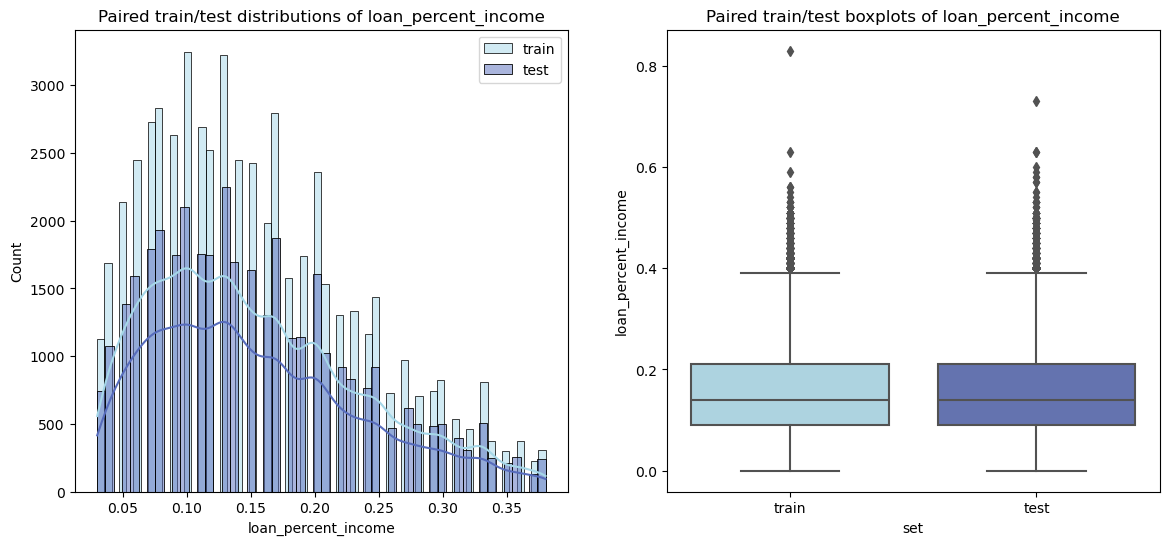

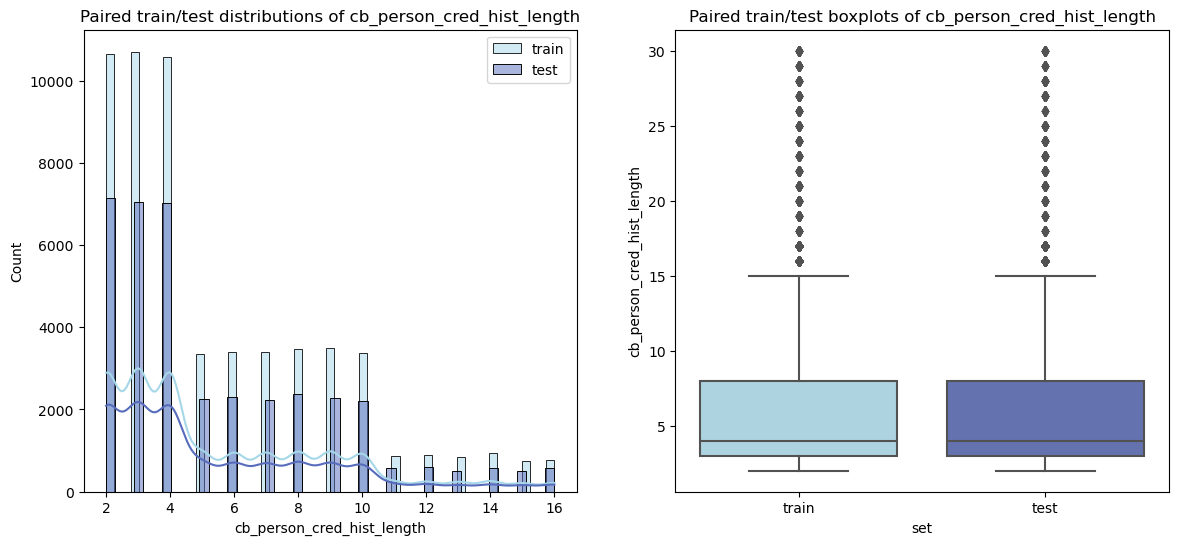

In [8]:
import seaborn as sns
import warnings

# Liste des colonnes numériques à analyser
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Fonction de tracé des distributions et boxplots
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    # Créer une copie des données et ajouter une colonne pour identifier l'ensemble de données
    train_copy = train.copy()
    train_copy['set'] = 'train'
    test_copy = test.copy()
    test_copy['set'] = 'test'
    
    # Fusionner les deux ensembles de données
    data_df = pd.concat([train_copy, test_copy])
    
    # Créer la figure et les axes
    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue] == s, feature]
        # Filtrer la sélection pour inclure uniquement les 95% centraux des données
        q_025, q_975 = np.percentile(selection.dropna(), [2.5, 97.5])
        selection_filtered = selection[(selection >= q_025) & (selection <= q_975)]
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s, kde=True)
    
    sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    
    # Configurer les titres et légendes
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    plt.show()

# Palette de couleurs
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]

# Tracer les distributions pour chaque colonne numérique
for feature in num_cols:
    plot_distribution_pairs(train_df, test_df, feature, palette=color_list)


Person_age

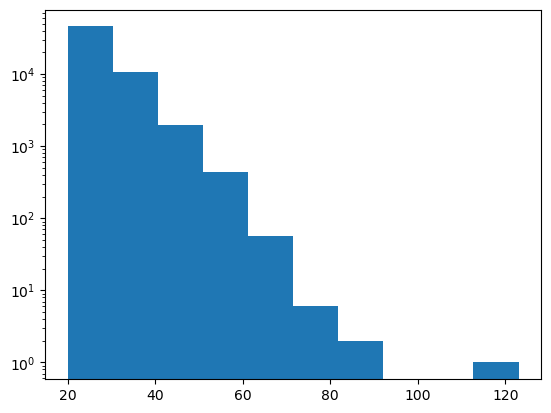

In [10]:
plt.hist(train_df['person_age'])
plt.yscale('log')

On remarque des outliers, on va retirer ceux de plus de 100 ans

Person_income

Text(0.5, 1.0, 'income')

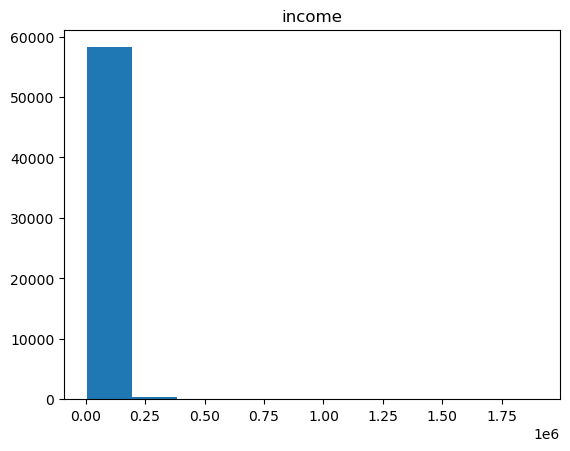

In [11]:
plt.hist(train_df['person_income'])
plt.title('income')


Ce code crée un histogramme des revenus (person_income) et applique une échelle logarithmique à l'axe y pour mieux visualiser les variations dans les fréquences.

plt.hist(data['person_income']) : Affiche un histogramme des valeurs de la colonne person_income.
plt.title('log_income') : Ajoute le titre "log_income" au graphique.
plt.yscale('log') : Définit l'axe y sur une échelle logarithmique pour mieux représenter les différences de fréquence.

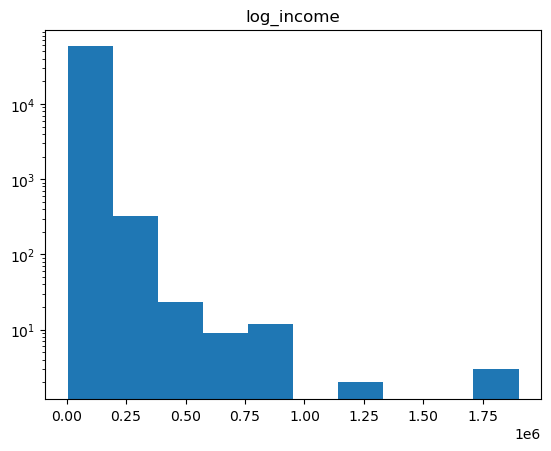

In [13]:
plt.hist(train_df['person_income'])
plt.title('log_income')
plt.yscale('log')

person_emp_length

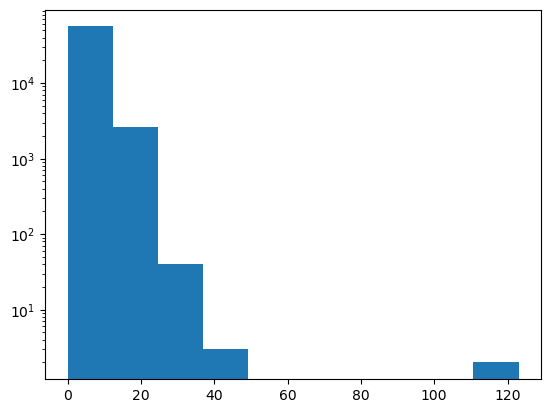

In [15]:
plt.hist(train_df['person_emp_length'])
plt.yscale('log')

Peu de personne travaille plus de 60 ans, il faudra les retirer

Correlation map

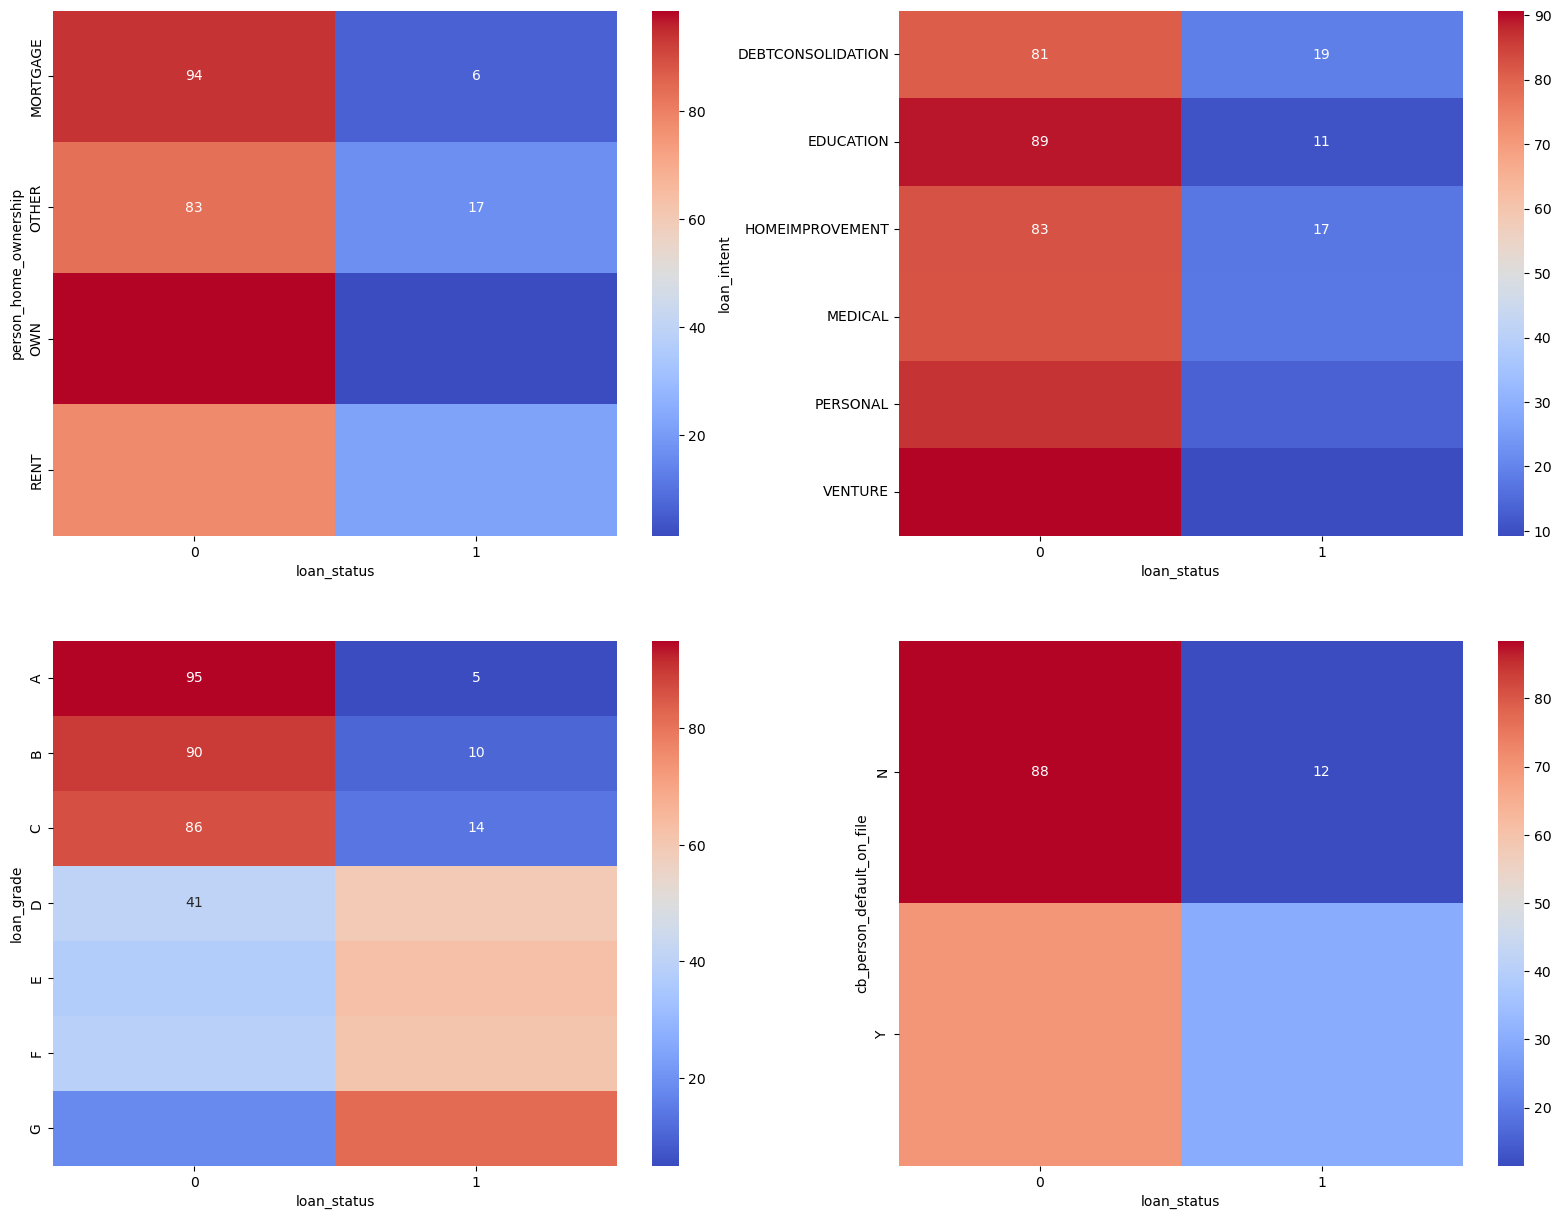

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data=round(100*pd.crosstab(train_df['person_home_ownership'], train_df['loan_status'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[0, 0])
sns.heatmap(data=round(100*pd.crosstab(train_df['loan_intent'], train_df['loan_status'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[0, 1])
sns.heatmap(data=round(100*pd.crosstab(train_df['loan_grade'], train_df['loan_status'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[1, 0]);
sns.heatmap(data=round(100*pd.crosstab(train_df['cb_person_default_on_file'], train_df['loan_status'], normalize=0), 2), annot=True, cmap=cmap, fmt='.0f', ax=axes[1, 1]);

These are a couple of observations from the above charts:

When loan_grade is equal to D, E, F, and G have the higher proportions of loan_status=1
cb_person_default_on_file=Y have a higher proportion loan_status=1 when compared to cb_person_default_on_file=N

distribution of the numerical features and potential relationships with loan_status

c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


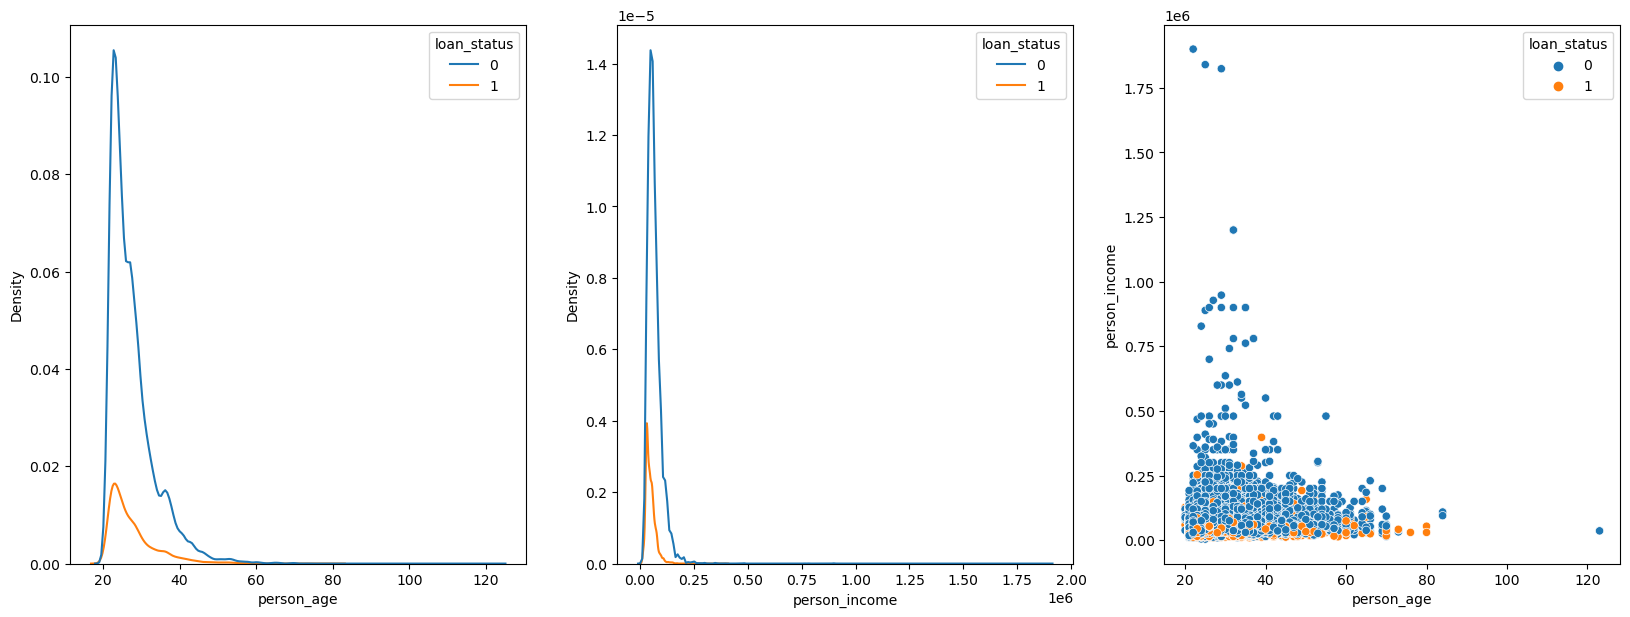

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.kdeplot(data=train_df, x='person_age', hue='loan_status', ax=axes[0]);
sns.kdeplot(data=train_df, x='person_income', hue='loan_status', ax=axes[1]);
sns.scatterplot(data=train_df, x='person_age', y='person_income', hue='loan_status', ax=axes[2]);

loan_status=0 and loan_status=1 have similar distributions for person_age and person_income

and we can still see the outlier in person age with the person at more than 120

c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


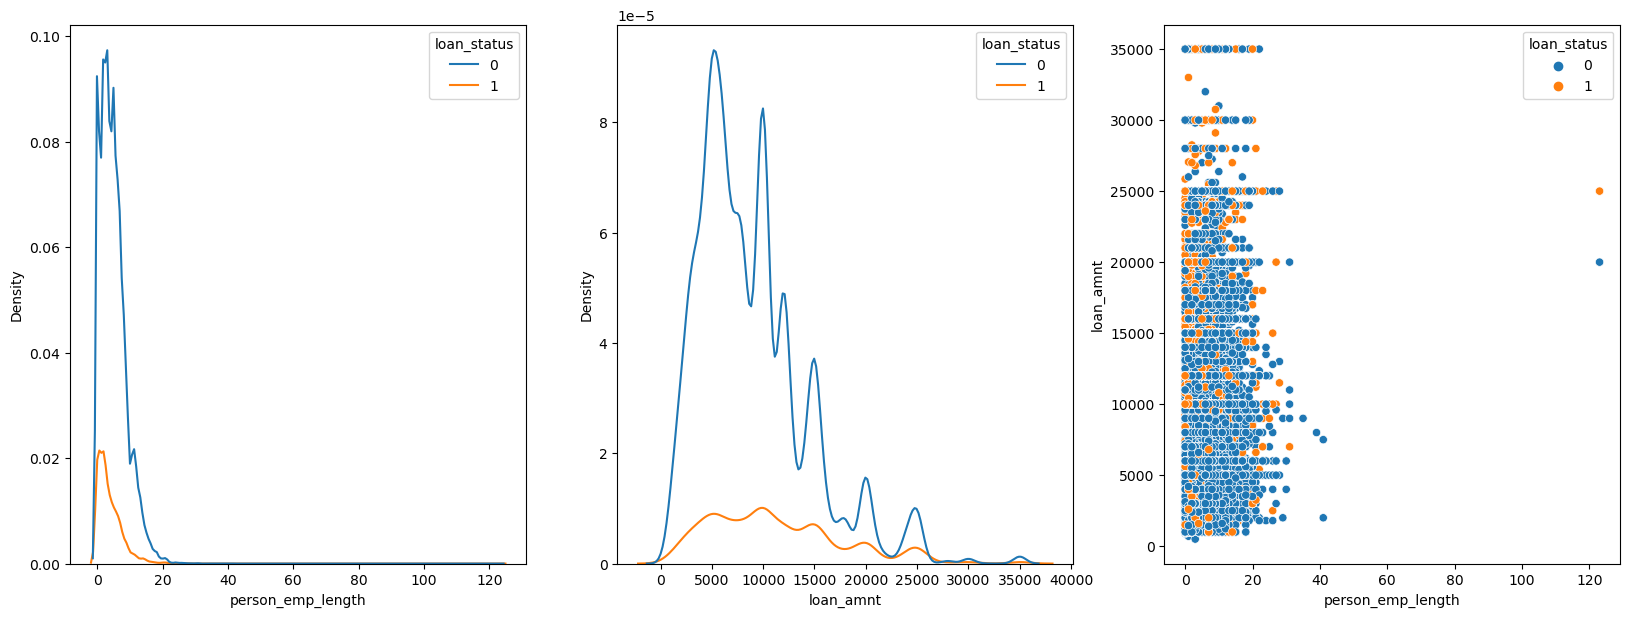

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.kdeplot(data=train_df, x='person_emp_length', hue='loan_status', ax=axes[0]);
sns.kdeplot(data=train_df, x='loan_amnt', hue='loan_status', ax=axes[1]);
sns.scatterplot(data=train_df, x='person_emp_length', y='loan_amnt', hue='loan_status', ax=axes[2]);

loan_status=0 and loan_status=1 have similar distributions for person_emp_length and loan_amnt
and we see the outlier in person_emp_length